<a href="https://colab.research.google.com/github/Elwing-Chou/ml1206/blob/main/inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model = InceptionV3(include_top=False, input_shape=(224, 224, 3))
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file="inception.png")

In [8]:
# 右一: 64個1x1conv
w = model.get_layer("conv2d_5").get_weights()[0]
w.shape

(1, 1, 192, 64)

In [9]:
# 右二: 模糊化 -> 32個1x1conv
w = model.get_layer("conv2d_11").get_weights()[0]
w.shape

(1, 1, 192, 32)

In [10]:
# 右三: 48個1x1conv(減低計算量)->64個5x5conv
w = model.get_layer("conv2d_6").get_weights()[0]
print(w.shape)
w = model.get_layer("conv2d_7").get_weights()[0]
print(w.shape)

(1, 1, 192, 48)
(5, 5, 48, 64)


In [11]:
# 右四: 64個1x1conv->96個3x3conv->96個3x3conv
w = model.get_layer("conv2d_8").get_weights()[0]
print(w.shape)
w = model.get_layer("conv2d_9").get_weights()[0]
print(w.shape)
w = model.get_layer("conv2d_10").get_weights()[0]
print(w.shape)

(1, 1, 192, 64)
(3, 3, 64, 96)
(3, 3, 96, 96)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Concatenate, Input, AveragePooling2D
# Tensor(向量) -> layer -> 下一個Tensor
i = Input(shape=(25, 25, 192))
# 右一
x1 = Conv2D(64, 1, padding="same", activation="relu")(i)
# 右二
x2 = AveragePooling2D(strides=(1, 1), padding="same")(i)
x2 = Conv2D(32, 1, padding="same", activation="relu")(x2)
# 右三
x3 = Conv2D(48, 1, padding="same", activation="relu")(i)
x3 = Conv2D(64, 5, padding="same", activation="relu")(x3)
# 右四
x4 = Conv2D(64, 1, padding="same", activation="relu")(i)
x4 = Conv2D(96, 3, padding="same", activation="relu")(x4)
x4 = Conv2D(96, 3, padding="same", activation="relu")(x4)
# combine
o = Concatenate(axis=-1)([x1, x2, x3, x4])
model = Model(inputs=i, outputs=o)
plot_model(model, show_shapes=True)

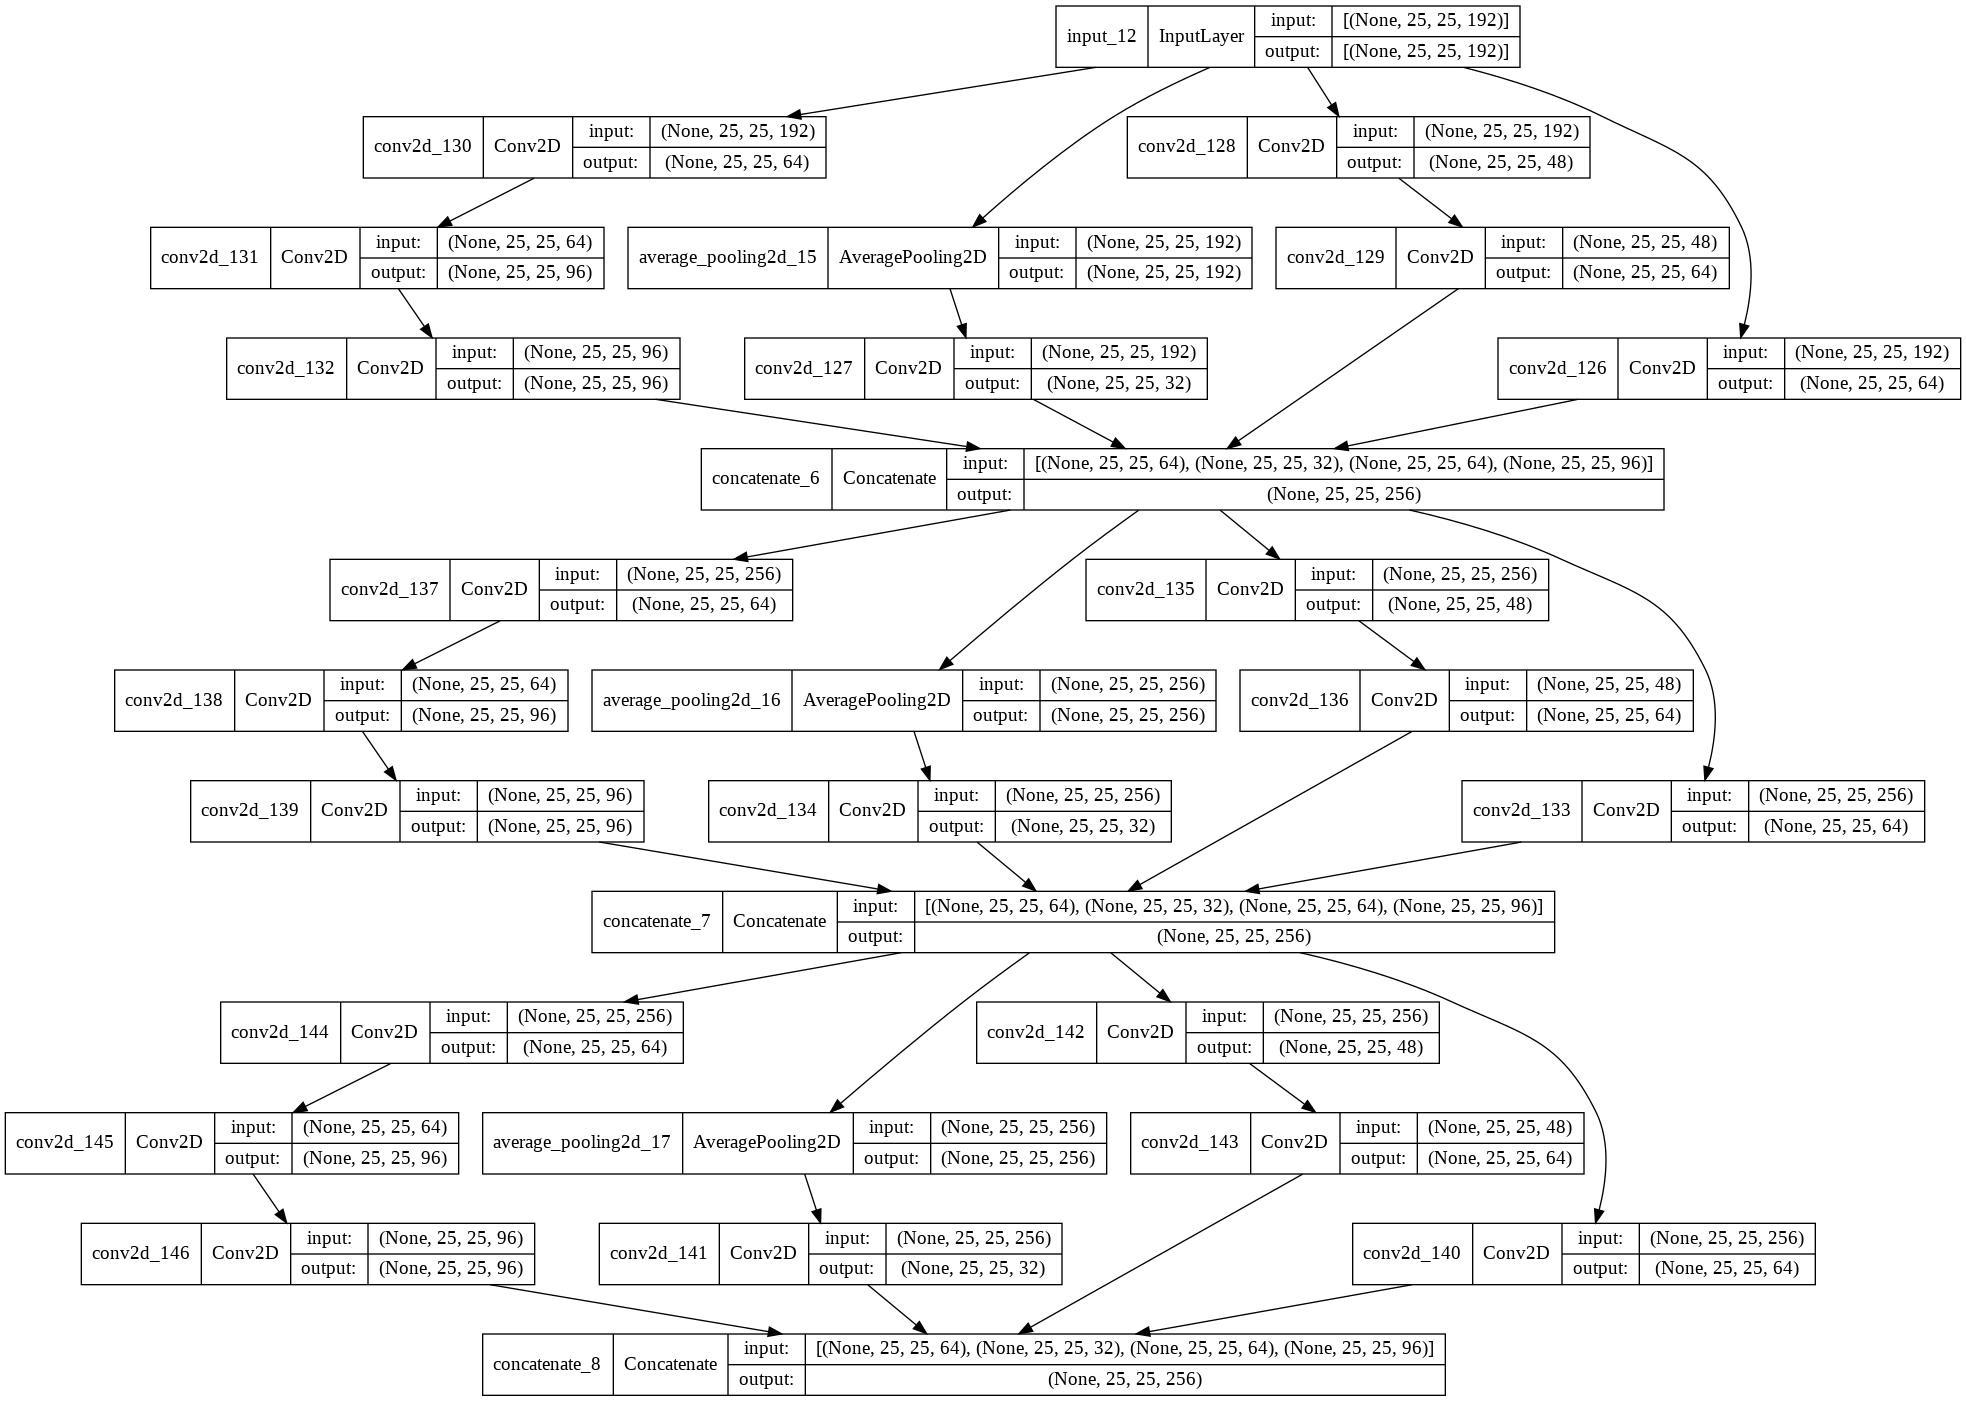

In [22]:
def conv_layer(i):
    # 右一
    x1 = Conv2D(64, 1, padding="same", activation="relu")(i)
    # 右二
    x2 = AveragePooling2D(strides=(1, 1), padding="same")(i)
    x2 = Conv2D(32, 1, padding="same", activation="relu")(x2)
    # 右三
    x3 = Conv2D(48, 1, padding="same", activation="relu")(i)
    x3 = Conv2D(64, 5, padding="same", activation="relu")(x3)
    # 右四
    x4 = Conv2D(64, 1, padding="same", activation="relu")(i)
    x4 = Conv2D(96, 3, padding="same", activation="relu")(x4)
    x4 = Conv2D(96, 3, padding="same", activation="relu")(x4)
    o = Concatenate(axis=-1)([x1, x2, x3, x4])
    return o

i = Input(shape=(25, 25, 192))
o = conv_layer(i)
o = conv_layer(o)
o = conv_layer(o)
model = Model(inputs=i, outputs=o)
plot_model(model, show_shapes=True)